In [ ]:
t = df.keys()[-1]
print('Target Attribute is: ', t)

Target Attribute is:  play


In [ ]:
attribute_names = list(df.keys())

In [ ]:
attribute_names.remove(t)
print('Predicting Attributes: ', attribute_names)

Predicting Attributes:  ['outlook', 'temp', 'humidity', 'windy']


In [ ]:
def classify(instance, tree,default=None):
    attribute = next(iter(tree))
    if instance[attribute] in tree[attribute].keys():
        result = tree[attribute][instance[attribute]]
        if isinstance(result, dict):
            return classify(instance, result)
        else:
            return result
    else:
        return default
df_new=pd.read_csv('/content/PlayTennis.csv')
df_new['predicted'] = df_new.apply(classify, axis=1, args=(tree,'?'))
print(df_new)

     outlook  temp humidity  windy play predicted
0      sunny   hot     high  False   no        no
1      sunny   hot     high   True   no        no
2   overcast   hot     high  False  yes       yes
3      rainy  mild     high  False  yes       yes
4      rainy  cool   normal  False  yes       yes
5      rainy  cool   normal   True   no        no
6   overcast  cool   normal   True  yes       yes
7      sunny  mild     high  False   no        no
8      sunny  cool   normal  False  yes       yes
9      rainy  mild   normal  False  yes       yes
10     sunny  mild   normal   True  yes       yes
11  overcast  mild     high   True  yes       yes
12  overcast   hot   normal  False  yes       yes
13     rainy  mild     high   True   no        no


In [ ]:
#back propogation
import numpy as np
X = np.array(([2, 9], [1, 5], [3, 6]), dtype=float)
y = np.array(([92], [86], [89]), dtype=float)
X = X/np.amax(X,axis=0)
y = y/100

def sigmoid (x):
  return 1/(1 + np.exp(-x))

def derivatives_sigmoid(x):
  return x * (1 - x)

epoch=5000
lr=0.1
inputlayer_neurons = 2
hiddenlayer_neurons = 3
output_neurons = 1
wh=np.random.uniform(size=(inputlayer_neurons,hiddenlayer_neurons))
bh=np.random.uniform(size=(1,hiddenlayer_neurons))
wout=np.random.uniform(size=(hiddenlayer_neurons,output_neurons))
bout=np.random.uniform(size=(1,output_neurons))

for i in range(epoch):
  hinp1=np.dot(X,wh)
  hinp=hinp1 + bh
  hlayer_act = sigmoid(hinp)
  outinp1=np.dot(hlayer_act,wout)
  outinp= outinp1+ bout
  output = sigmoid(outinp)
  EO = y-output
  outgrad = derivatives_sigmoid(output)
  d_output = EO* outgrad
  EH = d_output.dot(wout.T)
  hiddengrad = derivatives_sigmoid(hlayer_act)
  d_hiddenlayer = EH * hiddengrad
  wout += hlayer_act.T.dot(d_output) *lr
  wh += X.T.dot(d_hiddenlayer) *lr
print("Input: \n" + str(X))
print("Actual Output: \n" + str(y))
print("Predicted Output: \n" ,output)

Input: 
[[0.66666667 1.        ]
 [0.33333333 0.55555556]
 [1.         0.66666667]]
Actual Output: 
[[0.92]
 [0.86]
 [0.89]]
Predicted Output: 
 [[0.89580107]
 [0.87865091]
 [0.89497848]]


In [ ]:
import csv
import random
import math
import pandas as pd

def loadcsv(filename):
  lines = csv.reader(open('/content/naivedata.csv', "r"))
  dataset = list(lines)
  for i in range(len(dataset)):
    dataset[i] = [float(x) for x in dataset[i]]
  return dataset

def splitdataset(dataset, splitratio):
  trainsize = int(len(dataset) * splitratio)
  trainset = []
  copy = list(dataset)
  while len(trainset) < trainsize:
    index = random.randrange(len(copy));
    trainset.append(copy.pop(index))
  return [trainset, copy]

def separatebyclass(dataset):
  separated = {}
  for i in range(len(dataset)):
    vector = dataset[i]
    if (vector[-1] not in separated):
      separated[vector[-1]] = []
      separated[vector[-1]].append(vector)
  return separated

def mean(numbers):
  return sum(numbers)/float(len(numbers))

def stdev(numbers):
  avg = mean(numbers)
  variance = sum([pow(x-avg, 2) for x in numbers]) / float(len(numbers)+1)
  return math.sqrt(variance)

def summarize(dataset):
  summaries = [(mean(attribute), stdev(attribute)) for attribute in zip(*dataset)];
  del summaries[-1]
  return summaries

def summarizebyclass(dataset):
  separated = separatebyclass(dataset)
  summaries = {}
  for classvalue, instances in separated.items():
    summaries[classvalue] = summarize(instances)
  return summaries

def calculateprobability(x, mean, stdev):
  exponent = math.exp(-(math.pow(x-mean,2) / (2*math.pow(stdev-1, 2))))
  return (1 / (math.sqrt(2*math.pi) * stdev-1)) * exponent

def calculateclassprobabilities(summaries, inputvector):
  probabilities = {}
  for classvalue, classsummaries in summaries.items():
    probabilities[classvalue] = 1
    for i in range(len(classsummaries)):
      mean, stdev = classsummaries[i]
      x = inputvector[i]
      probabilities[classvalue] *= calculateprobability(x, mean, stdev)
  return probabilities

def predict(summaries, inputvector):
  probabilities = calculateclassprobabilities(summaries, inputvector)
  bestLabel, bestProb = None, -1
  for classvalue, probability in probabilities.items():
    if bestLabel is None or probability > bestProb:
      bestProb = probability
      bestLabel = classvalue
  return bestLabel

def getpredictions(summaries, testset):
  predictions = []
  for i in range(len(testset)):
    result = predict(summaries, testset[i])
    predictions.append(result)
  return predictions

def getaccuracy(testset, predictions):
  correct = 0
  for i in range(len(testset)):
    if testset[i][-1] == predictions[i]:
      correct += 1
  return (correct/float(len(testset))) * 100.0

def main():
  filename =  '/content/naivedata.csv'
  splitratio = 0.67
  dataset = loadcsv(filename)
  trainingset, testset = splitdataset(dataset, splitratio)
  print('Split {0} rows into train={1} and test={2} rows'.format(len(dataset), len(trainingset), len(testset)))
  summaries = summarizebyclass(trainingset)
  predictions = getpredictions(summaries, testset)
  accuracy = getaccuracy(testset, predictions)
  print('Accuracy of the classifier is : {0}%'.format(accuracy))

main()

Split 768 rows into train=514 and test=254 rows
Accuracy of the classifier is : 65.35433070866141%


In [ ]:
import csv
import random
import math

def loadcsv(filename):
	lines = csv.reader(open(filename, "r"));
	dataset = list(lines)
	for i in range(len(dataset)):
		dataset[i] = [float(x) for x in dataset[i]]
	return dataset

def splitdataset(dataset, splitratio):
	trainsize = int(len(dataset) * splitratio);
	trainset = []
	copy = list(dataset);
	while len(trainset) < trainsize:
		index = random.randrange(len(copy));
		trainset.append(copy.pop(index))
	return [trainset, copy]

def separatebyclass(dataset):
	separated = {}
	for i in range(len(dataset)):
		vector = dataset[i]
		if (vector[-1] not in separated):
			separated[vector[-1]] = []
		separated[vector[-1]].append(vector)
	return separated

def mean(numbers):
	return sum(numbers)/float(len(numbers))

def stdev(numbers):
	avg = mean(numbers)
	variance = sum([pow(x-avg,2) for x in numbers])/float(len(numbers)-1)
	return math.sqrt(variance)

def summarize(dataset):
	summaries = [(mean(attribute), stdev(attribute)) for attribute in zip(*dataset)];
	del summaries[-1]
	return summaries

def summarizebyclass(dataset):
	separated = separatebyclass(dataset);
	summaries = {}
	for classvalue, instances in separated.items():
		summaries[classvalue] = summarize(instances)
	return summaries

def calculateprobability(x, mean, stdev):
	exponent = math.exp(-(math.pow(x-mean,2)/(2*math.pow(stdev,2))))
	return (1 / (math.sqrt(2*math.pi) * stdev)) * exponent

def calculateclassprobabilities(summaries, inputvector):
	probabilities = {}
	for classvalue, classsummaries in summaries.items():
		probabilities[classvalue] = 1
		for i in range(len(classsummaries)):
			mean, stdev = classsummaries[i]
			x = inputvector[i]
			probabilities[classvalue] *= calculateprobability(x, mean, stdev);
	return probabilities

def predict(summaries, inputvector):
	probabilities = calculateclassprobabilities(summaries, inputvector)
	bestLabel, bestProb = None, -1
	for classvalue, probability in probabilities.items():
		if bestLabel is None or probability > bestProb:
			bestProb = probability
			bestLabel = classvalue
	return bestLabel

def getpredictions(summaries, testset):
	predictions = []
	for i in range(len(testset)):
		result = predict(summaries, testset[i])
		predictions.append(result)
	return predictions

def getaccuracy(testset, predictions):
	correct = 0
	for i in range(len(testset)):
		if testset[i][-1] == predictions[i]:
			correct += 1
	return (correct/float(len(testset))) * 100.0

def main():
	filename = '/content/naivedata.csv'
	splitratio = 0.67
	dataset = loadcsv(filename);
	trainingset, testset = splitdataset(dataset, splitratio)
	print('Split {0} rows into train={1} and test={2} rows'.format(len(dataset), len(trainingset), len(testset)))
	summaries = summarizebyclass(trainingset);
	predictions = getpredictions(summaries, testset)
	accuracy = getaccuracy(testset, predictions)
	print('Accuracy of the classifier is : {0}%'.format(accuracy))

main()

Split 768 rows into train=514 and test=254 rows
Accuracy of the classifier is : 75.98425196850394%


k neighbour

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


The accuracy score of K-Mean:  0.24
The Confusion matrixof K-Mean:  [[ 0 50  0]
 [48  0  2]
 [14  0 36]]


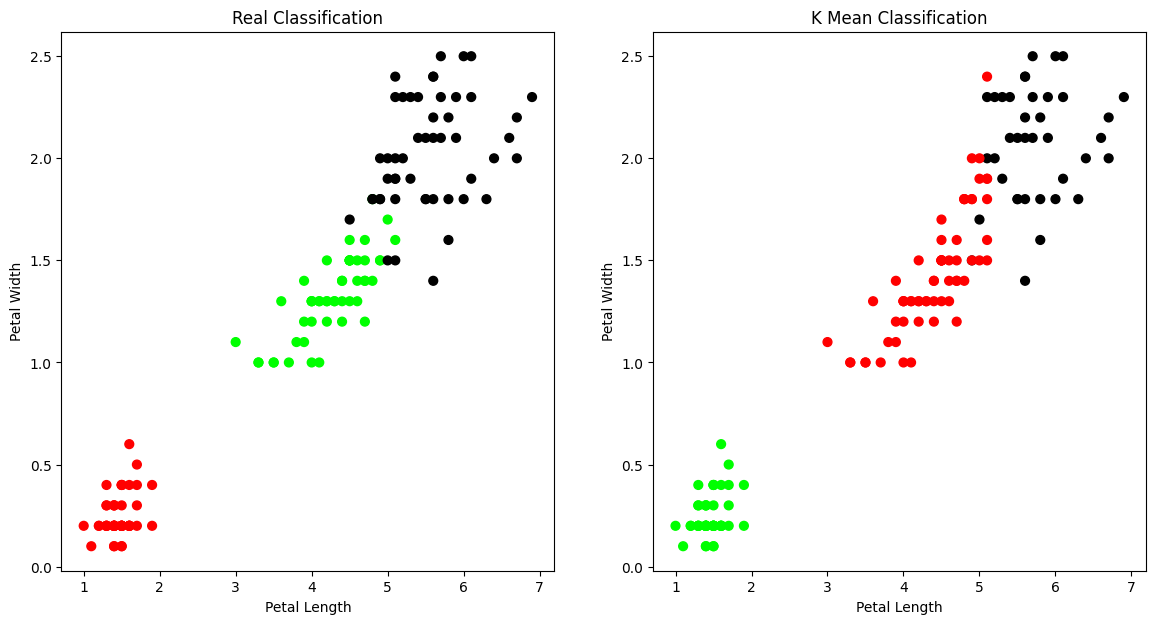

In [ ]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans
import sklearn.metrics as sm
import pandas as pd
import numpy as np
iris = datasets.load_iris()
X = pd.DataFrame(iris.data)
X.columns = ['Sepal_Length','Sepal_Width','Petal_Length','Petal_Width']
y = pd.DataFrame(iris.target)
y.columns = ['Targets']
model = KMeans(n_clusters=3)
model.fit(X)
plt.figure(figsize=(14,7))
colormap = np.array(['red', 'lime', 'black'])
plt.subplot(1, 2, 1)
plt.scatter(X.Petal_Length, X.Petal_Width, c=colormap[y.Targets], s=40)
plt.title('Real Classification')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.subplot(1, 2, 2)
plt.scatter(X.Petal_Length, X.Petal_Width, c=colormap[model.labels_], s=40)
plt.title('K Mean Classification')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
print('The accuracy score of K-Mean: ',sm.accuracy_score(y, model.labels_))
print('The Confusion matrixof K-Mean: ',sm.confusion_matrix(y, model.labels_))

The accuracy score of EM:  0.0
The Confusion matrix of EM:  [[ 0 50  0]
 [ 5  0 45]
 [50  0  0]]


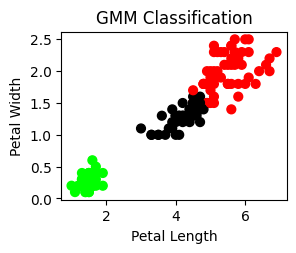

In [ ]:
from sklearn import preprocessing
from sklearn.mixture import GaussianMixture

scaler = preprocessing.StandardScaler()
scaler.fit(X)
xsa = scaler.transform(X)
xs = pd.DataFrame(xsa, columns = X.columns)
gmm = GaussianMixture(n_components=3)
gmm.fit(xs)
y_gmm = gmm.predict(xs)
plt.subplot(2, 2, 3)
plt.scatter(X.Petal_Length, X.Petal_Width, c=colormap[y_gmm], s=40)
plt.title('GMM Classification')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
print('The accuracy score of EM: ',sm.accuracy_score(y, y_gmm))
print('The Confusion matrix of EM: ',sm.confusion_matrix(y, y_gmm))

k MEANS


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import datasets

iris=datasets.load_iris()
x = iris.data
y = iris.target
print ('sepal-length', 'sepal-width', 'petal-length', 'petal-width')
print(x)
print('class: 0-Iris-Setosa, 1- Iris-Versicolour, 2- Iris-Virginica')
print(y)
x_train, x_test, y_train, y_test =train_test_split(x,y,test_size=0.3)
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(x_train, y_train)
y_pred=classifier.predict(x_test)
print('Confusion Matrix')
print(confusion_matrix(y_test,y_pred))
print('Accuracy Metrics')
print(classification_report(y_test,y_pred))

sepal-length sepal-width petal-length petal-width
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]


Locally Weighted Regression Algorithm

In [ ]:
import numpy as np
from bokeh.plotting import figure, show, output_notebook
from bokeh.layouts import gridplot
from bokeh.io import push_notebook
def local_regression(x0, X, Y, tau):
  x0 = np.r_[1, x0]
  X = np.c_[np.ones(len(X)), X]
  xw = X.T * radial_kernel(x0, X, tau)
  beta = np.linalg.pinv(xw @ X) @ xw @ Y
  return x0 @ beta

def radial_kernel(x0, X, tau):
  return np.exp(np.sum((X - x0) ** 2, axis=1) / (-2 * tau * tau))

n = 1000
X = np.linspace(-3, 3, num=n)
print("The Data Set ( 10 Samples) X :\n",X[1:10])
Y = np.log(np.abs(X ** 2 - 1) + .5)
print("The Fitting Curve Data Set (10 Samples) Y :\n",Y[1:10])

X += np.random.normal(scale=.1, size=n)
print("Normalised (10 Samples) X :\n",X[1:10])
domain = np.linspace(-3, 3, num=300)
print(" Xo Domain Space(10 Samples) :\n",domain[1:10])

def plot_lwr(tau):
  prediction = [local_regression(x0, X, Y, tau) for x0 in domain]
  plot = figure(plot_width=400, plot_height=400)
  plot.title.text='tau=%g' % tau
  plot.scatter(X, Y, alpha=.3)
  plot.line(domain, prediction, line_width=2, color='red')
  return plot

show(gridplot([[plot_lwr(10.), plot_lwr(1.)],[plot_lwr(0.1), plot_lwr(0.01)]]))

The Data Set ( 10 Samples) X :
 [-2.99399399 -2.98798799 -2.98198198 -2.97597598 -2.96996997 -2.96396396
 -2.95795796 -2.95195195 -2.94594595]
The Fitting Curve Data Set (10 Samples) Y :
 [2.13582188 2.13156806 2.12730467 2.12303166 2.11874898 2.11445659
 2.11015444 2.10584249 2.10152068]
Normalised (10 Samples) X :
 [-3.15382519 -3.02738713 -3.24955962 -2.96635743 -2.88347105 -2.75446783
 -3.05865318 -2.84206595 -2.91494193]
 Xo Domain Space(10 Samples) :
 [-2.97993311 -2.95986622 -2.93979933 -2.91973244 -2.89966555 -2.87959866
 -2.85953177 -2.83946488 -2.81939799]
